In [67]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score , accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold , StratifiedKFold
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split

### Chargement de dataset

In [68]:
df = pd.read_csv("heart_failure_clinical_records.csv")

In [69]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [70]:
# Vue générale sur dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB
None


In [71]:
nouveau_tableau = df.iloc[4000:5000]

In [72]:
nouveau_tableau

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4000,50.0,1,121,1,40,0,260000.0,0.7,130,1,0,175,0
4001,53.0,1,1808,0,60,1,249000.0,0.7,138,1,1,106,0
4002,68.0,1,1021,1,35,0,271000.0,1.1,134,1,0,197,0
4003,53.0,1,1808,0,60,1,249000.0,0.7,138,1,1,106,0
4004,52.0,1,191,1,30,1,334000.0,1.0,142,1,1,216,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1


In [73]:
indices_a_supprimer = list(range(4000, 5000))
new_df = df[~df.index.isin(indices_a_supprimer)]
new_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
3996,52.0,0,132,0,30,0,218000.00,0.7,136,1,1,112,0
3997,65.0,0,198,1,35,1,281000.00,0.9,137,1,1,146,0
3998,80.0,0,148,1,38,0,149000.00,1.9,144,1,1,23,1


### Séparation des variables

In [74]:
X = new_df.drop(columns=['DEATH_EVENT'])  
y = new_df['DEATH_EVENT']

In [75]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43
3996,52.0,0,132,0,30,0,218000.00,0.7,136,1,1,112
3997,65.0,0,198,1,35,1,281000.00,0.9,137,1,1,146
3998,80.0,0,148,1,38,0,149000.00,1.9,144,1,1,23


### Prétraitement des données du dataset

In [76]:
# Traitement des valeurs manquantes

In [77]:
# Encodage des valeurs catégorielles 

In [78]:
# Vérifier si les caractéristiques sont toutes numériques (pas de variables catégorielles)
if not X.select_dtypes(include=['object']).columns.any():
    print("Les caractéristiques ne contiennent pas de variables catégorielles. Aucun encodage nécessaire.")


Les caractéristiques ne contiennent pas de variables catégorielles. Aucun encodage nécessaire.


In [79]:
# Mettre à l'échelle les données numériques
scaler =MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.27272727, 0.        , 0.09249809, ..., 1.        , 1.        ,
        0.29893238],
       [0.45454545, 0.        , 0.00421026, ..., 1.        , 0.        ,
        0.72241993],
       [0.09090909, 0.        , 0.07131921, ..., 0.        , 0.        ,
        0.85409253],
       ...,
       [0.45454545, 0.        , 0.02232712, ..., 1.        , 1.        ,
        0.50533808],
       [0.72727273, 0.        , 0.01594795, ..., 1.        , 1.        ,
        0.06761566],
       [0.45454545, 0.        , 0.01212044, ..., 1.        , 1.        ,
        0.6975089 ]])

In [80]:
# Divisez le dataset en deux 80% pour les données d'entrainement et le reste pour le test.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8,random_state=42)


## Mise en œuvre des algorithmes d’apprentissage pour la résolution du problématique

### logisicRegression model 

In [81]:
#rechercher les meilleurs hyperparamètres pour un modèle de régression logistique
# Définir la grille des hyperparamètres à rechercher
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],  # Ces solveurs prennent en charge la régularisation L1
    'class_weight': [None, 'balanced']
}

# Créer un modèle de régression logistique
logistic_model = LogisticRegression()

# Recherche sur grille avec validation croisée
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres:", best_params)

# Utiliser les meilleurs hyperparamètres pour créer un nouveau modèle de régression logistique
best_logistic_model = LogisticRegression(**best_params)

# Entraîner le modèle avec les meilleurs hyperparamètres sur l'ensemble d'entraînement
best_logistic_model.fit(X_train, y_train)

# Prédire les étiquettes de l'ensemble de test avec le meilleur modèle
y_pred_best = best_logistic_model.predict(X_test)

# Calculer la précision du meilleur modèle
best_accuracy = accuracy_score(y_test, y_pred_best)
print("Accuracy du meilleur modèle de régression logistique:", best_accuracy)

# Évaluer les performances du modèle
report = classification_report(y_test, y_pred_best)
print("Classification Report:\n", report)

Meilleurs hyperparamètres: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
Accuracy du meilleur modèle de régression logistique: 0.82625
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       540
           1       0.76      0.67      0.72       260

    accuracy                           0.83       800
   macro avg       0.81      0.79      0.80       800
weighted avg       0.82      0.83      0.82       800



Text(0.5, 427.9555555555555, 'Étiquette prévue')

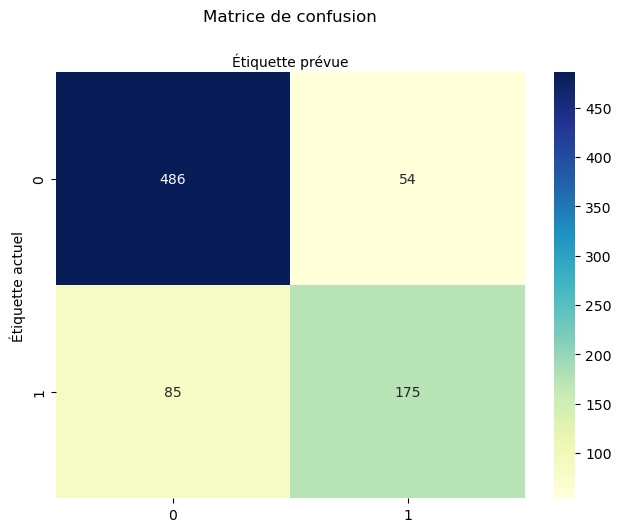

In [82]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_best)

class_names=[0,1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Étiquette actuel')
plt.xlabel('Étiquette prévue')

In [83]:
#validation croisée
stratified_kfold1 = StratifiedKFold(n_splits=5)
stratified_kfold_scoresLR = cross_val_score(best_logistic_model,X_train, y_train, cv=stratified_kfold1)

### DecisionTreeClassifier Model

In [84]:
DecisionTreeModel1 = DecisionTreeClassifier(criterion="entropy",max_depth=5)
DecisionTreeModel1.fit(X_train , y_train)
y_predDT1 = DecisionTreeModel1.predict(X_test)
accuracyDT1 = accuracy_score(y_test, y_predDT1)
print("Précision du modèle :", accuracyDT1)


Précision du modèle : 0.91


In [85]:
for depth in range(1, 15):
    dtree = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"max_depth={depth} : {accuracy*100:.2f}%")

max_depth=1 : 83.50%
max_depth=2 : 83.50%
max_depth=3 : 84.75%
max_depth=4 : 87.12%
max_depth=5 : 91.00%
max_depth=6 : 94.00%
max_depth=7 : 95.88%
max_depth=8 : 97.00%
max_depth=9 : 97.38%
max_depth=10 : 97.75%
max_depth=11 : 97.88%
max_depth=12 : 97.88%
max_depth=13 : 97.50%
max_depth=14 : 98.12%


In [86]:
for depth in range(1, 15):
    dtree = DecisionTreeClassifier(criterion="gini", max_depth=depth)
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"max_depth={depth} : {accuracy*100:.2f}%")

max_depth=1 : 83.50%
max_depth=2 : 83.50%
max_depth=3 : 86.50%
max_depth=4 : 88.25%
max_depth=5 : 91.38%
max_depth=6 : 95.38%
max_depth=7 : 95.75%
max_depth=8 : 97.62%
max_depth=9 : 98.25%
max_depth=10 : 98.25%
max_depth=11 : 97.88%
max_depth=12 : 98.00%
max_depth=13 : 98.25%
max_depth=14 : 98.00%


In [87]:
## essayons améliorer les performances du modèle
DecisionTreeModel2 = DecisionTreeClassifier(criterion = "gini" ,max_depth=9)
DecisionTreeModel2.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=9)

In [88]:
# Faire des prédictions sur l'ensemble de test
y_predDT2 = DecisionTreeModel2.predict(X_test)


In [89]:
# Évaluer les performances du modèle

accuracyDT2 = accuracy_score(y_test, y_predDT2)
reportDT2 = classification_report(y_test, y_predDT2)

print("Accuracy:", accuracyDT2)
print("Classification Report:\n", reportDT2)

Accuracy: 0.9825
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       540
           1       0.98      0.97      0.97       260

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



Text(0.5, 427.9555555555555, 'Étiquette\xa0prévue')

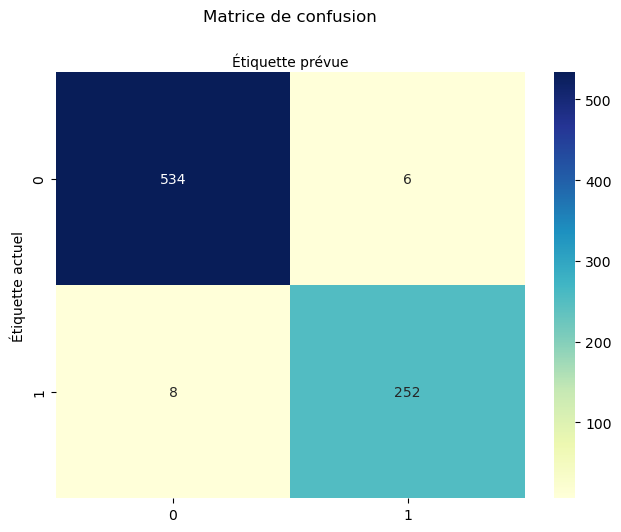

In [90]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_predDT2)

class_names=[0,1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Étiquette actuel')
plt.xlabel('Étiquette prévue')

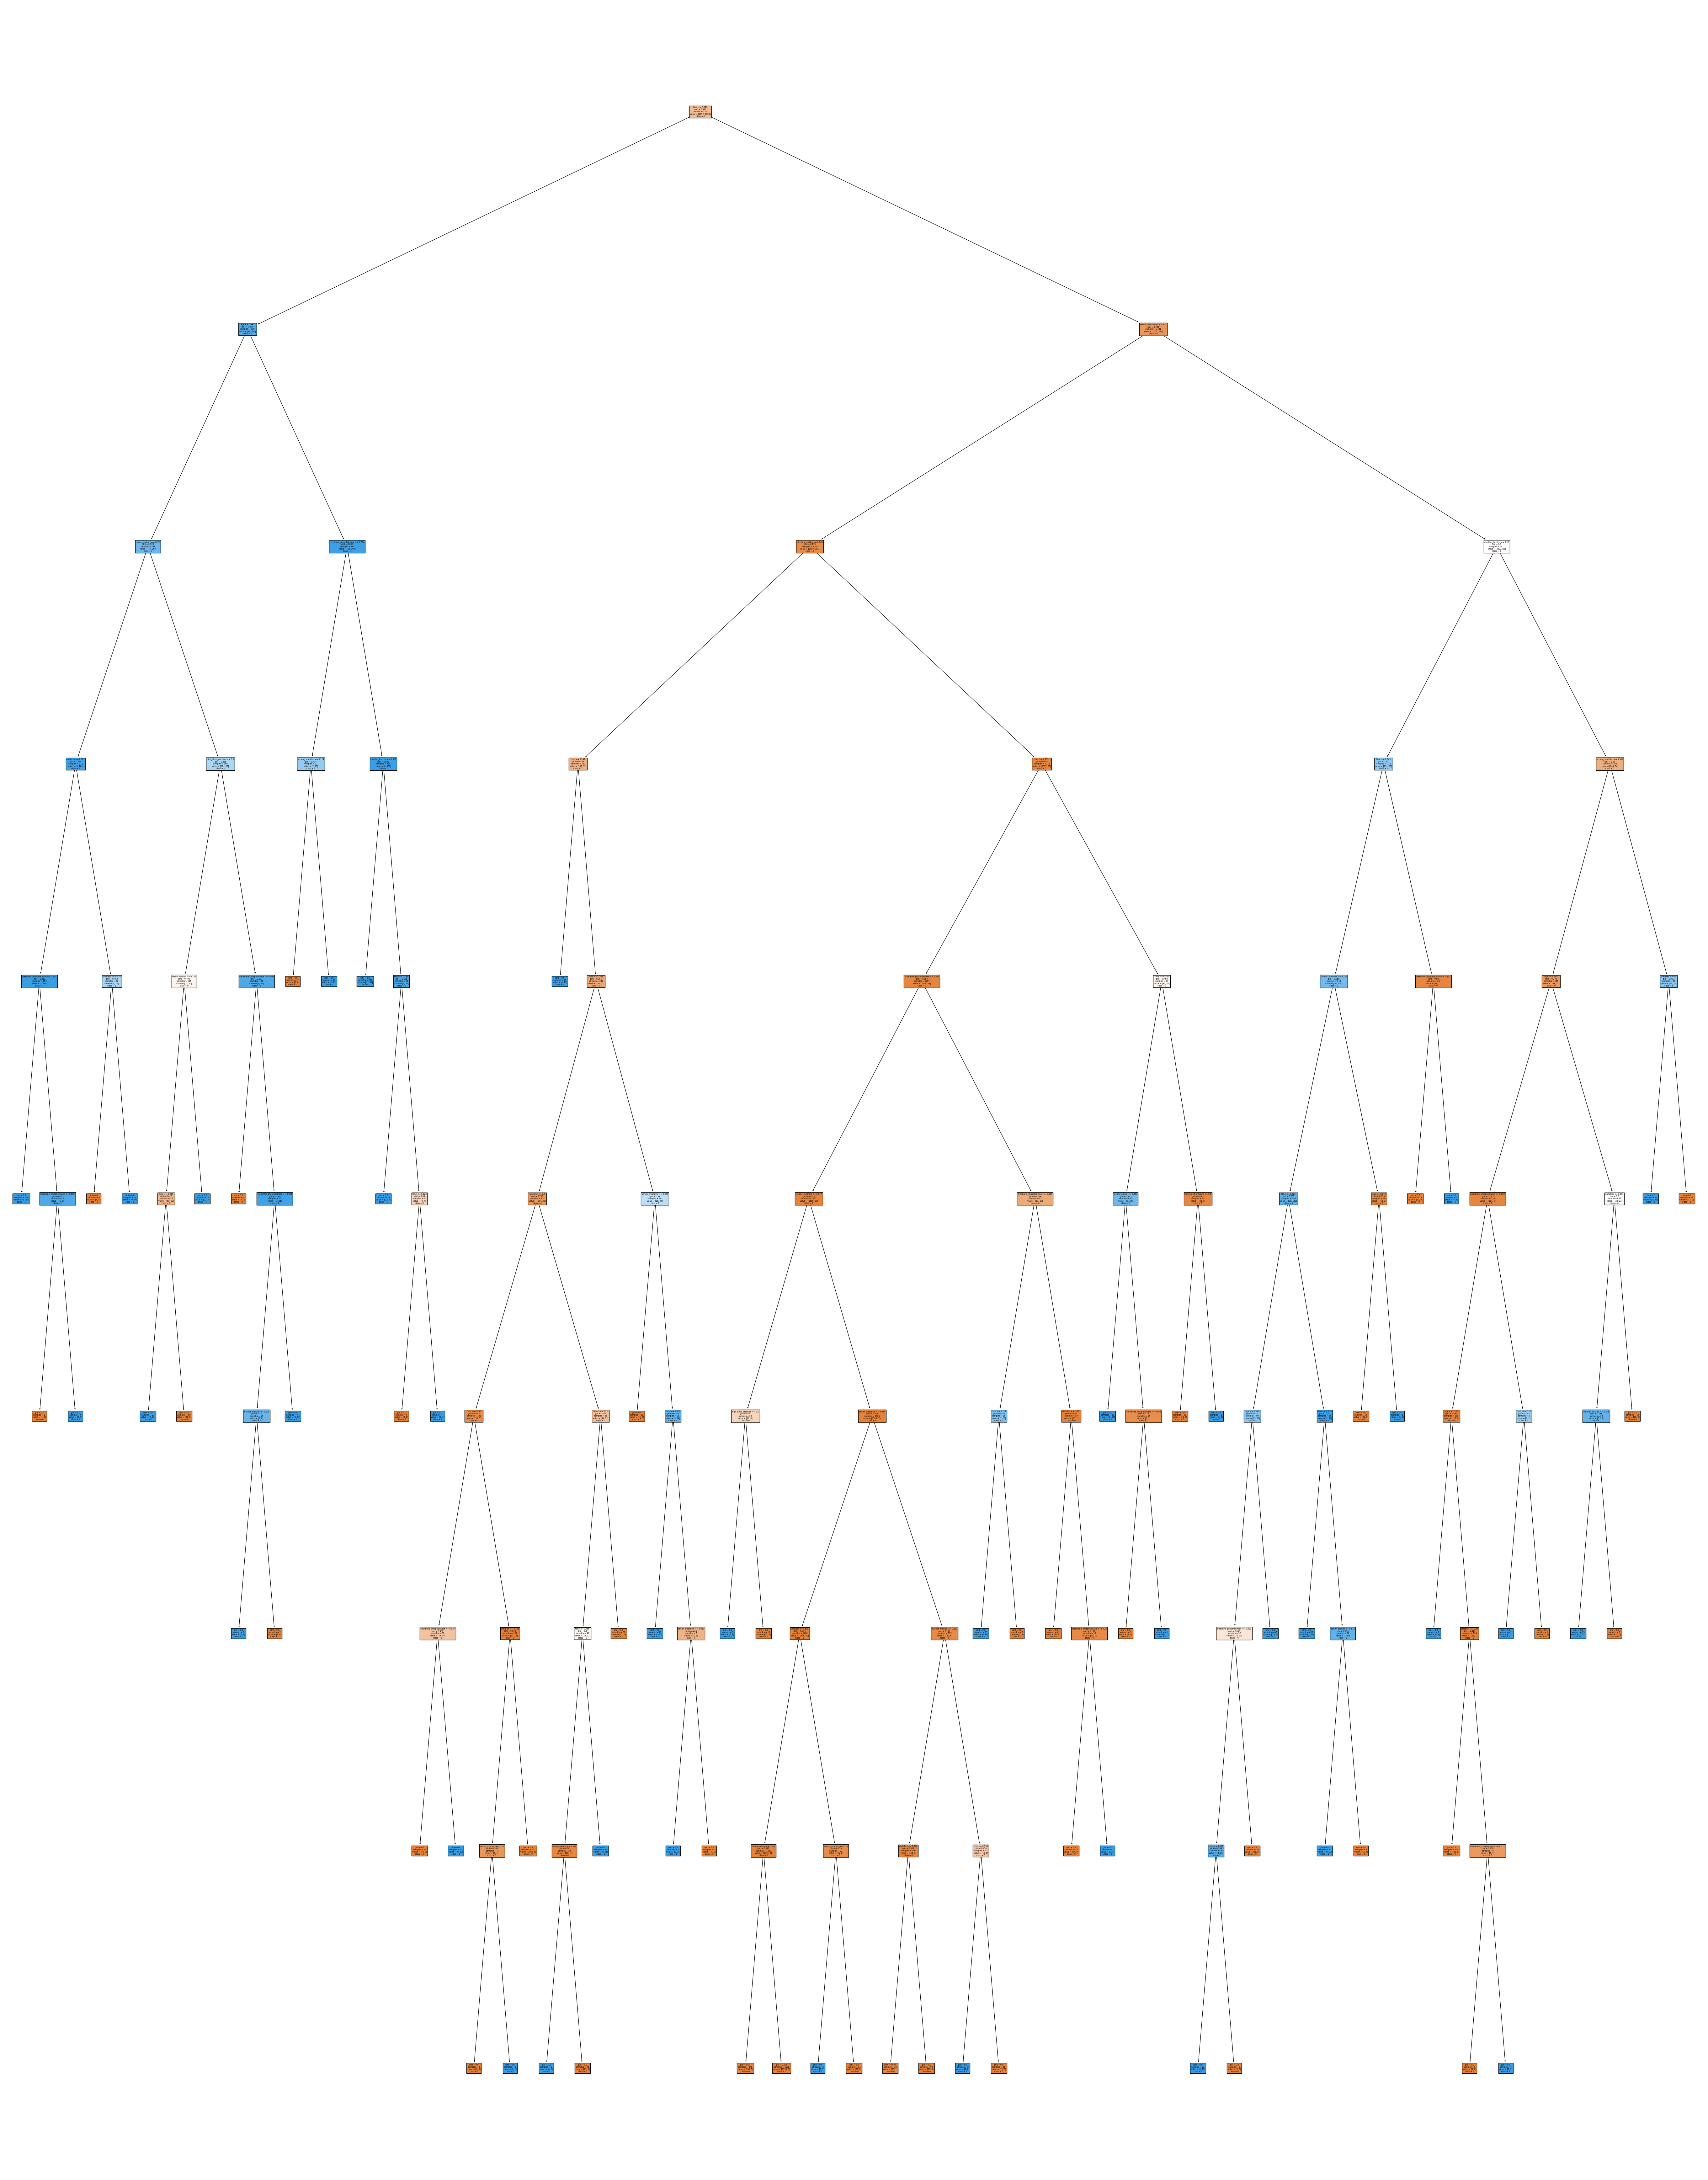

In [91]:
plt.figure(figsize=(70, 90))
X = new_df.drop(columns=['DEATH_EVENT'])  

plot_tree(DecisionTreeModel2, 
          feature_names=X.columns.tolist(),  
          class_names=["0","1"],
          filled=True)
plt.show()

In [92]:
## Validation croisée
stratified_kfold2 = StratifiedKFold(n_splits=5)
stratified_kfold_scoresAD = cross_val_score(DecisionTreeModel2,X_train, y_train, cv=stratified_kfold2)

### KNeighborsClassifier Model

In [93]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_predKnn1 = knn_model.predict(X_test)
accuracyKnn1 = accuracy_score(y_test, y_predKnn1)
print("Précision du modèle :", accuracyKnn1)

Précision du modèle : 0.925


In [94]:
# Utilisation la validation croisée afin d’identifier la meilleure valeur pour K
knn_model2 = KNeighborsClassifier()

# Définir la grille de paramètres à rechercher
param_grid2 = {'n_neighbors': range(1, 21)}  # Valeurs de k de 1 à 20



# Initialiser l'objet GridSearchCV
grid_search2 = GridSearchCV(knn_model2, param_grid2, cv=5)

# Effectuer la recherche de grille sur les données d'entraînement normalisées
grid_search2.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", grid_search2.best_params_)
print("Meilleur score de précision :", grid_search2.best_score_)

Meilleurs paramètres : {'n_neighbors': 1}
Meilleur score de précision : 0.965625


In [95]:
knn_model2 = KNeighborsClassifier(n_neighbors=1)

In [96]:
## Entrainer le modele 
knn_model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [97]:
# Évaluer les performances du modèle

y_predKnn2 = knn_model2.predict(X_test)
accuracyKnn2 = accuracy_score(y_test, y_predKnn2)
print("Précision du modèle :", accuracyKnn2)

reportKnn2 = classification_report(y_test, y_predKnn2)
print("Classification Report:\n", reportKnn2)

Précision du modèle : 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       540
           1       0.95      0.95      0.95       260

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



Text(0.5, 427.9555555555555, 'Étiquette\xa0prévue')

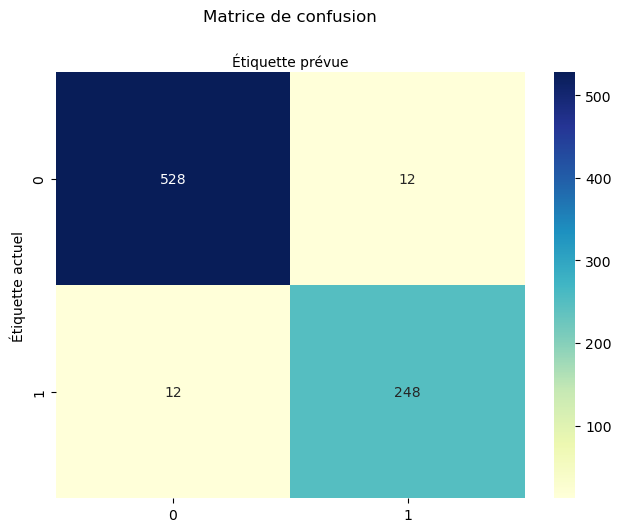

In [98]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_predKnn2)

class_names=[0,1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Étiquette actuel')
plt.xlabel('Étiquette prévue')

In [99]:
#validation croisée
stratified_kfold3 = StratifiedKFold(n_splits=5)
stratified_kfold_scoresKNN = cross_val_score(knn_model2,X_train, y_train, cv=stratified_kfold3)

### Random Forest

In [100]:
rf_model1 = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, min_samples_leaf=1, random_state=42)

# Entraîner le modèle
rf_model1.fit(X_train, y_train)

# Prédire sur les données de test
y_predRF1 = rf_model1.predict(X_test)
accuracyRF1 = accuracy_score(y_test, y_predRF1)
print("Précision du modèle :", accuracyRF1)


Précision du modèle : 0.925


In [111]:
#modifions les valeurs des hyperparametres
rf_model2 = RandomForestClassifier(n_estimators=400, max_depth=15, min_samples_split=5, min_samples_leaf=1, random_state=42)

# Entraîner le modèle
rf_model2.fit(X_train, y_train)

# Prédire sur les données de test
y_predRF2 = rf_model2.predict(X_test)
accuracyRF2 = accuracy_score(y_test, y_predRF2)
print("Précision du modèle :", accuracyRF2)
reportRF2 = classification_report(y_test, y_predRF2)
print("Classification Report:\n", reportRF2)

Précision du modèle : 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       540
           1       0.99      0.98      0.98       260

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



Text(0.5, 427.9555555555555, 'Étiquette prévue')

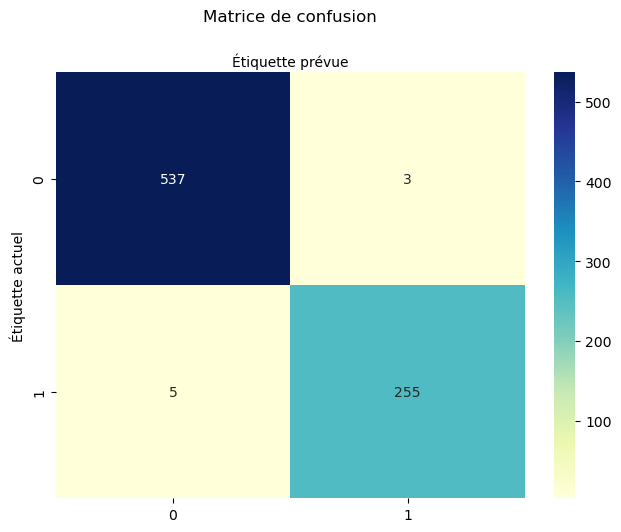

In [112]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_predRF2)

class_names=[0,1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Étiquette actuel')
plt.xlabel('Étiquette prévue')

In [113]:
#validation croisée
stratified_kfold4 = StratifiedKFold(n_splits=5)
stratified_kfold_scoresRF = cross_val_score(rf_model2,X_train, y_train, cv=stratified_kfold4)

In [114]:
#etude de performance des models mis en oeuvre
print("Scores de la validation croisée stratifiée pour le model LogisticRegression :", stratified_kfold_scoresLR)
print("Moyenne des scores de la validation croisée stratifiée pour le model LogisticRegression :", np.mean(stratified_kfold_scoresLR))
print('\n')

print("Scores de la validation croisée stratifiée pour le model DecisionTreeClassifier:", stratified_kfold_scoresAD)
print("Moyenne des scores de la validation croisée stratifiée pour le model DecisionTreeClassifier:", np.mean(stratified_kfold_scoresAD))
print('\n')

print("Scores de la validation croisée stratifiée pour le model Knn:", stratified_kfold_scoresKNN)
print("Moyenne des scores de la validation croisée stratifiée pour le model Knn:", np.mean(stratified_kfold_scoresKNN))
print('\n')

print("Scores de la validation croisée stratifiée pour le model Random Forest:", stratified_kfold_scoresRF)
print("Moyenne des scores de la validation croisée stratifiée pour le model Random Forest:", np.mean(stratified_kfold_scoresRF))


Scores de la validation croisée stratifiée pour le model LogisticRegression : [0.871875  0.8640625 0.8734375 0.8484375 0.8375   ]
Moyenne des scores de la validation croisée stratifiée pour le model LogisticRegression : 0.8590625000000001


Scores de la validation croisée stratifiée pour le model DecisionTreeClassifier: [0.978125  0.9828125 0.9859375 0.984375  0.9734375]
Moyenne des scores de la validation croisée stratifiée pour le model DecisionTreeClassifier: 0.9809374999999999


Scores de la validation croisée stratifiée pour le model Knn: [0.9671875 0.965625  0.9578125 0.96875   0.96875  ]
Moyenne des scores de la validation croisée stratifiée pour le model Knn: 0.965625


Scores de la validation croisée stratifiée pour le model Random Forest: [0.990625 0.99375  0.9875   0.990625 0.9875  ]
Moyenne des scores de la validation croisée stratifiée pour le model Random Forest: 0.99


In [115]:
x_features_test = nouveau_tableau.drop(columns=['DEATH_EVENT'])
y_target_test = nouveau_tableau['DEATH_EVENT']

In [116]:
y_predict_result = rf_model2.predict(x_features_test)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [117]:
y_predict_result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [118]:
y_target_test

4000    0
4001    0
4002    0
4003    0
4004    0
       ..
4995    0
4996    0
4997    1
4998    1
4999    0
Name: DEATH_EVENT, Length: 1000, dtype: int64

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
accuracy = accuracy_score(y_target_test, y_predict_result)
print("Accuracy:", accuracy)



Accuracy: 0.7


In [120]:
from sklearn.metrics import mean_absolute_error

# y_true: valeurs cibles
# y_pred: valeurs prédites
mae = mean_absolute_error(y_target_test, y_predict_result)
mae

0.3